# Análisis y visualización de datos con Python
# 2. Descarga y exploración de datos

    - a) Estructura de un proyecto de datos
    - b) Obtención del conjunto de datos
    - c) Cargar los datos en Python
    - d) Conjuntos de datos ordenados
    - e) Exploración básica con profiles
    - f) Opciones avanzadas de profiling
    - g) Resumen
    
---

En este notebook, exploraremos un conjunto de datos real utilizando la biblioteca de Python **Pandas**. No solo aprenderás a usar Pandas, sino que también aplicaremos técnicas de análisis de datos para descubrir patrones y tendencias interesantes. El objetivo es que te familiarices con el proceso de un análisis de datos completo.

Trabajaremos con las **[Estadísticas de Defunciones Registradas (EDR)](https://www.inegi.org.mx/programas/edr/)**, una base de datos generada por el Instituto Nacional de Estadística y Geografía (INEGI) de México.

Este ejercicio te servirá como base para el proyecto final del curso, donde aplicarás estas mismas etapas y técnicas en un subconjunto de datos para resolver un problema de tu interés.

## 2.a Estructura de un proyecto de datos

Todo proyecto de análisis de datos debe estar bien organizado y documentado. Esto garantiza que el trabajo sea repetible, transparente y fácil de entender tanto para ti como para otros. La documentación incluye detallar los pasos, las decisiones tomadas y los resultados obtenidos, lo que es clave para la reproducibilidad.

Además de la organización, es crucial considerar la **ética de los datos**, incluyendo la privacidad, la seguridad y la responsabilidad legal. Es importante tomar medidas para proteger los datos sensibles, por ejemplo, encriptando archivos y restringiendo el acceso.

Un análisis de datos se compone de varias etapas interconectadas. Aunque pueden variar, la mayoría de los proyectos incluyen los siguientes pasos:
1.  **Obtención de datos**: Es la fase inicial donde se recopilan los datos. Estos pueden provenir de diversas fuentes, como bases de datos, hojas de cálculo o APIs.
2.  **Exploración de datos** (**EDA** por sus siglas en inglés): Aquí te familiarizas con la estructura original del conjunto de datos. Observas su formato, el número de tablas, las columnas que contiene y su contenido. 
3.  **Limpieza de datos**: En este paso, preparas los datos para el análisis. La limpieza consiste en corregir o eliminar valores incorrectos, duplicados o incompletos para asegurar su calidad.
4.  **Análisis**: Una vez que los datos están listos, extraes la información y el conocimiento que buscas. Esta etapa puede incluir múltiples sub-análisis y técnicas.

Además de estos pasos, la **visualización de datos** es una herramienta esencial que se utiliza en casi todas las etapas. Permite representar los datos de forma gráfica, facilitando su comprensión y la identificación de patrones. 

Para evitar errores y facilitar la revisión del proceso, es recomendable:
* **Separar las etapas**: Organiza cada etapa del análisis en diferentes carpetas o archivos.
* **Documentar las decisiones**: Explica en el notebook las razones detrás del procesamiento de datos, las suposiciones que hiciste o cualquier hipótesis formulada. Esta documentación es crucial para que, a futuro, tanto tú como otros entiendan tu proceso.
* **Controlar las versiones**: Utiliza sistemas como **Git** para rastrear los cambios en tus archivos y código. Esto te permite tener un historial completo del proyecto.

Es importante recordar que estas etapas no siempre se dan de forma lineal. A menudo, el análisis de datos es un proceso cíclico e iterativo. Después de la limpieza, podrías descubrir nuevos problemas que te obliguen a volver a la etapa de exploración. O, después del análisis, podrías encontrar que necesitas refinar tus datos y volver a la limpieza.

En resumen, un flujo de trabajo organizado y bien documentado es fundamental para que tu análisis sea **confiable**, **reproducible** y de alta calidad.

### Entorno de trabajo

Para empezar, organizaremos nuestro proyecto de análisis de datos. 

El primer paso es crear una **carpeta de trabajo** principal. Es fundamental que el nombre de esta carpeta sea descriptivo para que, de un vistazo, sepas qué contiene. Por ejemplo, `Python_EDR_2023` es un nombre ideal, ya que nos indica que el proyecto usa **Python** para analizar las estadísticas de defunciones (**EDR**) del año **2023**.

Dentro de esta carpeta principal, crearemos las siguientes subcarpetas para mantener nuestro trabajo ordenado:

* `data_raw`: Aquí guardaremos los archivos de datos originales, tal como los descargamos.
* `profiles`: En esta carpeta, almacenaremos las exploraciones automáticas de los datos (perfiles).
* `data_clean`: Aquí pondremos las versiones de los datos que ya hayamos limpiado y preparado para el análisis.
* `extras`: Esta carpeta es para cualquier archivo adicional, como imágenes, mapas o referencias importantes.

> Nota sobre `data_raw`: Una de las reglas de oro del análisis de datos es nunca modificar los archivos originales en la carpeta `data_raw`. Si necesitas hacer algún cambio, siempre trabaja con una copia y guárdala en la carpeta `data_clean`. De esta forma, siempre tendrás una versión inalterada de los datos para volver a consultar si algo sale mal.

Para nuestro análisis, utilizaremos un **Jupyter Notebook** dentro de **Anaconda**. Este entorno nos permite combinar código de Python, visualizaciones y texto explicativo en un solo lugar. Usaremos la biblioteca **Pandas** para el análisis y **`ydata_profiling`** para generar perfiles de datos de manera automática.

Para comenzar, necesitas tener el Notebook y una copia de los datos dentro de tu carpeta de trabajo.

Tienes dos opciones para obtener el Notebook:

A) **Crear uno nuevo**: Inicia un nuevo Notebook desde la interfaz de Jupyter.
B) **Copiar uno existente**: Si alguien te ha compartido un Notebook, simplemente cópialo en tu carpeta de trabajo.

Una vez que tengas el Notebook creado o copiado, ábrelo y **verifica que estés trabajando en la carpeta correcta**.

Una buena práctica es darle al notebook un nombre significativo. Este nombre debe reflejar tanto el proyecto como la etapa en la que te encuentras. Por ejemplo, un nombre como ´CPEDR_2Exploracion.ipynb´ nos indica de inmediato que estamos trabajando en el proyecto de las Estadísticas de Defunciones Registradas (EDR) y que el objetivo de este notebook es la Exploración de los datos. Elegir un buen nombre facilita la organización y el seguimiento de tu trabajo a lo largo del tiempo.

### Obtención del conjunto de datos

A continuación hay que **obtener los datos**, en este caso, trabajaremos con un conjunto de datos real y de importancia social: las **Estadísticas de Defunciones Registradas (EDR)**. Este conjunto de datos es producido por el Instituto Nacional de Estadística y Geografía (**INEGI**), la agencia gubernamental encargada de generar la información estadística y geográfica de México. Según el INEGI, el objetivo de las EDR es:
> "Generar y difundir la información sobre el fenómeno de la mortalidad en el país, lo que permite conocer y comparar el volumen, tendencia y características de la mortalidad en los diferentes ámbitos geográficos de México."

Esta información es crucial para el análisis demográfico, la toma de decisiones en salud pública y la evaluación de programas sociales.

Para nuestro análisis, utilizaremos los **microdatos**. Los microdatos son archivos que contienen la información detallada e individual recopilada en una encuesta o registro, es decir, cada fila corresponde a un registro único (en este caso, una defunción). A diferencia de los datos agregados, que presentan resúmenes, los microdatos nos permiten realizar análisis más profundos y personalizados.

Para obtener el archivo que necesitamos directamente de la fuente oficial:

1.  **Navega al sitio web del INEGI**: Dirígete a la sección de [microdatos de las EDR](https://www.inegi.org.mx/programas/edr/#microdatos).
2.  **Selecciona el año**: Para este ejercicio, utilizaremos los datos del año **2023**. Busca y descarga el archivo comprimido (`.zip`) correspondiente.
3.  **Organiza tus archivos**: Coloca el archivo `.zip` en la carpeta `data_raw` que creamos en la sección anterior. **Es crucial que descomprimas el archivo `.zip` dentro de esta carpeta**, lo cual creará una nueva subcarpeta (por ejemplo, `defunciones_base_datos_2023_dbf`) que contendrá todos los archivos de datos originales.

### Checklist: Estructura del proyecto

1. Entorno de trabajo
* Carpeta del proyecto principal con un nombre descriptivo.
* Subcarpetas:
    * `data_raw`: Para los archivos de datos originales.
    * `profiles`: Para los perfiles de datos automáticos.
    * `data_clean`: Para los datos procesados.
    * `extras`: Para archivos de referencia, imágenes, etc.
* Jupyter Notebook para la exploración inicial con un nombre descriptivo.

2. Datos
* Archivo de datos descargado: en este caso el archivo `defunciones_base_datos_2023_dbf.zip` del INEGI.
    * Archivo de datos original en la subcarpeta `data_raw`.
    * Datos descomprimidos dentro de una subcarpeta en `data_raw`.



## 2.b Familiarizarse con los datos

Antes de escribir cualquier línea de código, es crucial familiarizarnos con los archivos que descargamos. Este paso nos ayuda a entender el tipo de datos que tenemos y a anticipar los desafíos que podríamos enfrentar.

Como viste, la carpeta que descomprimiste contiene varios archivos. Esto es común, ya que los proyectos de datos a menudo incluyen la base de datos principal, catálogos (o tablas auxiliares) y metadatos.

La mayoría de los archivos que vemos tienen la extensión `.dbf`. Este es el formato de archivo de **dBase**, una de las primeras bases de datos relacionales para microcomputadoras. Aunque no es tan común hoy en día, sigue siendo usado para la distribución de datos estadísticos. Es importante saber que un archivo `.dbf` está estructurado en filas y columnas, similar a una hoja de cálculo, lo que facilitará su lectura con Pandas.

Revisemos la lista de archivos para entender su propósito:

- `DEFUN23.dbf`: Este es el **conjunto de datos principal**. Contiene la información de cada defunción registrada en 2023. Aquí es donde encontraremos los datos que analizaremos.
- `Descripcion_BD_Defunciones_2023.pdf`: Este es el archivo de **metadatos o diccionario de datos**. Es el documento más importante en esta etapa, ya que describe el contenido de cada una de las bases de datos, los campos que contienen y los catálogos.
- `*.dbf`: El resto de los archivos con extensión `.dbf` son **catálogos** o **tablas de referencia**. No contienen la información de las defunciones en sí, sino que sirven para traducir los códigos numéricos que aparecen en `DEFUN23.dbf` a información legible. Por ejemplo, en el archivo principal podríamos tener un código `09` para la entidad donde sucedio la defunción, y en el catálogo `CATEMLDE23.dbf` se explica que `09` corresponde a 'Ciudad de México'.

### Ejercicio: revisar los metadatos

Tómate un momento ahora para abrir el archivo `Descripcion_BD_Defunciones_2023.pdf`.

Revisa el índice o la tabla de contenido y fíjate en la estructura del documento. Busca las secciones que describen las variables del conjunto de datos principal (`DEFUN23.dbf`) y los catálogos. No necesitas memorizar todo, pero es crucial que sepas dónde encontrar esta información cuando la necesites para interpretar los datos más adelante.

Responde las siguientes preguntas:

1. ¿Qué información esperas encontrar en el conjunto de datos?
2. ¿Qué información está contenida en cada archivo?
    * `DEFUN23.dbf`
    * `Descripcion_BD_Defunciones_2023.pdf`
    *  El resto de los archivos `.dbf`
3. ¿Cómo se codifica en sexo en el conjunto de datos?
4. ¿Cuáles son las limitaciones del EDR?

### Apertura del conjunto de datos en el Notebook

Ahora que ya conoces tus archivos, el siguiente paso es cargarlos en tu **Jupyter Notebook** para empezar a explorarlos con Python.

Cargar un conjunto de datos implica mucho más que simplemente abrir un archivo. Es el proceso de transferir datos almacenados en un formato externo (como un archivo CSV, una base de datos o un archivo de texto) a la memoria de trabajo de tu programa. Es el puente entre los datos "en reposo" y los datos "en acción".

Para trabajar con nuestros datos, usaremos la biblioteca `pandas`, que es la herramienta estándar de Python para el análisis y manipulación de datos tabulares. Para usarla, primero debemos **importar las bibliotecas**. Es una convención muy común en la comunidad de Python importarla con el alias `pd`, lo que nos permite referirnos a ella de forma más corta y práctica.

Además, el archivo principal `DEFUN23.dbf` tiene una extensión `.dbf`. Este formato no es compatible por defecto con `pandas`, por lo que necesitaremos una biblioteca adicional para leerlo. Usaremos `dbfread`.

Con las bibliotecas ya listas, podemos cargar los datos. Primero, leemos el archivo `.dbf` con `DBF` y luego lo convertimos en un `DataFrame` de `pandas`. Un `DataFrame` es una estructura de datos bidimensional (como una tabla) que nos permite trabajar de manera eficiente con los datos.

Revisamos que el proceso funciono escribiendo `df` **en la última linea d la celda**. Esto nos muestra la tabla en la celda de output, pero ya que esta es muy grande, solo nos muestra las primeras y últimas filas, representando las faltantes con `...`.

En la esquina inferior izquierda se puede ver el número de filas y columnas, en este caso hay `799869 rows × 74 columns`.

In [1]:
#! pip install dbfread

# Importar bibliotecas
import pandas as pd
from dbfread import DBF

# Cargar los datos
file_path = './data_raw/defunciones_base_datos_2023_dbf/DEFUN23.dbf' # <-- pega el path al folder dentro de las comillas
df = DBF(file_path) #cargar archivo dbf
df = pd.DataFrame(df) # volver DataFrame

# Revisar los datos
df

,ENT_REGIS,MUN_REGIS,TLOC_REGIS,LOC_REGIS,ENT_RESID,MUN_RESID,TLOC_RESID,LOC_RESID,ENT_OCURR,MUN_OCURR,...,COMPLICARO,DIA_CERT,MES_CERT,ANIO_CERT,MATERNAS,ENT_OCULES,MUN_OCULES,LOC_OCULES,RAZON_M,DIS_RE_OAX
0,01,001,15,0001,32,044,5,0001,01,001,...,9,18,12,2022,,88,888,8888,NaN,999
1,01,001,15,0001,01,001,15,0001,01,001,...,9,12,12,2022,,88,888,8888,NaN,999
2,01,001,15,0001,01,001,15,0001,01,001,...,9,17,12,2022,,88,888,8888,NaN,999
3,01,001,15,0001,01,001,15,0001,01,001,...,9,1,1,2023,,88,888,8888,NaN,999
4,01,001,15,0001,14,053,1,7777,01,001,...,8,22,12,2022,,88,888,8888,NaN,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799864,32,024,8,0001,32,024,8,0001,32,024,...,8,99,12,2023,,88,888,8888,NaN,999
799865,32,056,13,0001,32,056,13,0001,32,056,...,8,5,6,2023,,88,888,8888,NaN,999
799866,32,056,13,0001,32,017,4,0042,32,056,...,8,9,8,2023,,88,888,8888,NaN,999
799867,32,056,13,0001,32,017,13,0001,32,056,...,8,19,9,2023,,88,888,8888,NaN,999


Una vez que los datos han sido cargados en un DataFrame, es fundamental realizar una verificación rápida. Este paso te permite confirmar que el proceso de carga fue exitoso y que los datos se almacenaron con la estructura y los tipos de datos correctos. Algunos comandos útiles para este propósito son:

* `df.columns`: Muestra la lista completa de todas las columnas (variables) del DataFrame. Este comando es especialmente útil cuando hay un gran número de columnas, ya que te permite ver todos los nombres sin necesidad de desplazarte por toda la tabla.
* `df.head()` y `df.tail()`: Muestra las primeras o últimas 5 filas del DataFrame. Esto te da un panorama visual inmediato de cómo lucen las columnas y los datos.


In [2]:
df.columns

Index(['ENT_REGIS', 'MUN_REGIS', 'TLOC_REGIS', 'LOC_REGIS', 'ENT_RESID',
       'MUN_RESID', 'TLOC_RESID', 'LOC_RESID', 'ENT_OCURR', 'MUN_OCURR',
       'TLOC_OCURR', 'LOC_OCURR', 'CAUSA_DEF', 'COD_ADICIO', 'LISTA_MEX',
       'SEXO', 'ENT_NAC', 'AFROMEX', 'CONINDIG', 'LENGUA', 'CVE_LENGUA',
       'NACIONALID', 'NACESP_CVE', 'EDAD', 'SEM_GEST', 'GRAMOS', 'DIA_OCURR',
       'MES_OCURR', 'ANIO_OCUR', 'DIA_REGIS', 'MES_REGIS', 'ANIO_REGIS',
       'DIA_NACIM', 'MES_NACIM', 'ANIO_NACIM', 'COND_ACT', 'OCUPACION',
       'ESCOLARIDA', 'EDO_CIVIL', 'TIPO_DEFUN', 'OCURR_TRAB', 'LUGAR_OCUR',
       'PAR_AGRE', 'VIO_FAMI', 'ASIST_MEDI', 'CIRUGIA', 'NATVIOLE',
       'NECROPSIA', 'USONECROPS', 'ENCEFALICA', 'DONADOR', 'SITIO_OCUR',
       'COND_CERT', 'DERECHOHAB', 'EMBARAZO', 'REL_EMBA', 'HORAS', 'MINUTOS',
       'CAPITULO', 'GRUPO', 'LISTA1', 'GR_LISMEX', 'AREA_UR', 'EDAD_AGRU',
       'COMPLICARO', 'DIA_CERT', 'MES_CERT', 'ANIO_CERT', 'MATERNAS',
       'ENT_OCULES', 'MUN_OCULES', 'LOC_OCUL

## 2.c Conjuntos de datos ordenados (Tidy Data)


Para el análisis de datos debemos de familiarizarnos con varias definiciones, usando como ejemplo el EDR:

* **Variable**: Un atributo que estamos midiendo. En la tabla de defunciones, el **sexo**, la **edad** y la **causa de muerte** son variables.
* **Valor**: La medida específica de una variable para una observación. Si la variable es "sexo", el valor podría ser "Hombre". Si la variable es "edad", el valor podría ser "25".
* **Observación**: El conjunto de todos los valores medidos para una unidad de estudio. En nuestra tabla, **una fila entera** es una observación, ya que contiene todos los valores (sexo, edad, causa, etc.) para una defunción específica.


Para trabajar de manera efectiva con los datos, es crucial entender los conceptos detrás de su organización. Hadley Wickham, una figura clave en la ciencia de datos, propuso los principios de los **Datos Ordenados (Tidy Data)**. Un conjunto de datos ordenado es aquel que está estructurado de una forma estándar y predecible, lo que facilita enormemente su limpieza y análisis.

Un conjunto de datos se considera ordenado cuando cumple con tres reglas fundamentales:
1.  **Cada variable forma una columna.**  Esto significa que cada característica que queremos analizar (edad, sexo, causa de muerte) tiene su propia columna.
2.  **Cada observación forma una fila.** Cada registro individual (en nuestro caso, cada defunción) es una fila única.
3.  **Cada tipo de unidad de observación forma una tabla.** Si tuviéramos datos de defunciones y de nacimientos, cada uno debería ir en una tabla separada.

El equivalente de "Tidy Data" en el mundo de las bases de datos relacionales es la normalización de bases de datos. 

Aunque nuestro conjunto de datos de las EDR ya está bien estructurado, no siempre es así. Los datos que recibimos inicialmente, a menudo llamados datos crudos, suelen estar "desordenados" (untidy). Podrían tener varias variables en una sola columna o información repetida. En muchos proyectos, la limpieza de datos incluye el transformar esos datos crudos en un conjunto de datos ordenado y listo para ser analizado, siguiendo los principios que acabamos de aprender.


### Tipos de datos

Los datos no son todos iguales. Es importante identificar su tipo, ya que esto determina qué operaciones podemos realizar con ellos.

* **Numéricos** (`int` o `float`): Valores que se pueden contar o medir. Pueden ser discretos (números enteros, como la cantidad de hijos) o continuos (números decimales, como la edad).
* **Categóricos** (`category`): Valores que pertenecen a un conjunto limitado de categorías. Por ejemplo, el **sexo** (hombre/mujer) o el **estado civil** (soltero, casado, etc.).
* **Binarios** (`bool`): Un tipo de dato categórico con solo dos valores posibles, como "Verdadero" o "Falso".
* **Fecha** (`datetime64`): Representan un punto en el tiempo.
* **Texto** (`object`): Cadenas de caracteres que no se usan para cálculos.
* **Coordenadas**: Datos de ubicación geográfica.


Es común que los datos estén incompletos. En `pandas`, los **valores faltantes** se representan con `NaN` (Not a Number) o `None`. Este es un tema muy complejo al que regresaremos más adelante.

Cuando cargas un archivo (como un CSV o un DBF), este solo contiene texto. Pandas no "sabe" de antemano qué tipo de dato es cada columna. Su trabajo es leer el archivo y adivinar inteligentemente el tipo de dato basándose en el contenido de cada columna. Por ejemplo, si una columna solo contiene números, Pandas la inferirá como un tipo numérico (`int` o `float`). Si una columna contiene texto, fechas o una mezcla de tipos, la inferirá como `object`. Esta inferencia automática te ahorra mucho tiempo, pero a veces puede ser inexacta (por ejemplo, al inferir números de identificación como valores numéricos en lugar de texto), por lo que es vital revisarla con `df.info()`.

**Nota sobre `object`**. Pandas asigna el tipo `object` cuando una columna contiene:
* Cadenas de texto `strings`.
* Una mezcla de tipos de datos, como números y texto.
* Valores faltantes (`None` o `NaN`) en una columna que originalmente era de números enteros, ya que el tipo `int` no puede representar valores nulos.
Piensa en él como el tipo de dato que almacena cualquier cosa que no sea un número o una fecha clara, como nombres, descripciones, identificadores, etc. Es importante estar atento a las columnas de tipo `object` porque, aunque parezcan contener números, Pandas no puede realizar operaciones matemáticas directamente sobre ellas. En un análisis de datos, a menudo necesitarás limpiar y convertir estas columnas al tipo de dato correcto antes de usarlas.

### Ejercicio: datos ordenados

Ahora, con las definiciones claras, aplica estos conceptos a tu conjunto de datos de las EDR. 
Identifica en la tabla que estás trabajando:
1.  **Variables, valores y observaciones**: ¿Qué representa cada una de estas definiciones en la tabla de `DEFUN23.dbf`?
2.  **Tipos de datos**: ¿Qué tipos de datos podrías encontrar en las columnas del DataFrame de las EDR? (e.g., ¿la edad es numérica?, ¿el género es categórico?).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799869 entries, 0 to 799868
Data columns (total 74 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ENT_REGIS   799869 non-null  object 
 1   MUN_REGIS   799869 non-null  object 
 2   TLOC_REGIS  799869 non-null  int64  
 3   LOC_REGIS   799869 non-null  object 
 4   ENT_RESID   799869 non-null  object 
 5   MUN_RESID   799869 non-null  object 
 6   TLOC_RESID  799869 non-null  int64  
 7   LOC_RESID   799869 non-null  object 
 8   ENT_OCURR   799869 non-null  object 
 9   MUN_OCURR   799869 non-null  object 
 10  TLOC_OCURR  799869 non-null  int64  
 11  LOC_OCURR   799869 non-null  object 
 12  CAUSA_DEF   799869 non-null  object 
 13  COD_ADICIO  799869 non-null  object 
 14  LISTA_MEX   799869 non-null  object 
 15  SEXO        799869 non-null  int64  
 16  ENT_NAC     799869 non-null  object 
 17  AFROMEX     799869 non-null  object 
 18  CONINDIG    799869 non-null  object 
 19  LE

## 2.d Exploración automática de datos

Ahora que los datos están cargados, es momento de familiarizarnos con ellos. A esta etapa se le conoce como **Análisis Exploratorio de Datos** (EDA, por sus siglas en inglés). El EDA sirve para descubrir patrones, detectar anomalías y validar la calidad de los datos antes de pasar a un análisis más profundo.

Para agilizar este proceso, utilizaremos una herramienta llamada [`ydata-profiling`](https://www.google.com/search?q=%5Bhttps://ydata-profiling.ydata.ai/docs/master/index.html%5D\(https://ydata-profiling.ydata.ai/docs/master/index.html\)). Esta biblioteca automatiza gran parte del EDA al generar un informe detallado con solo unas pocas líneas de código.

Esta herramienta es ideal para la exploración inicial, ya que:

  * **Infiere los tipos de datos**: Confirma si Pandas ha asignado correctamente los tipos de datos (`int`, `float`, `object`, etc.).
  * **Identifica problemas**: Muestra de forma clara la cantidad de valores faltantes, duplicados, valores atípicos y otras anomalías.
  * **Proporciona estadísticas básicas**: Calcula estadísticas descriptivas (media, mediana, desviación estándar) para las variables numéricas y muestra la distribución de las variables categóricas.
  * **Detecta correlaciones**: Visualiza la relación entre las variables, lo que puede ayudarte a encontrar patrones interesantes.

Dado el gran tamaño del EDR, haremos un perfil mínimo para reducir el tiempo de cómputo.
Una vez que el proceso finalice, podrás abrir el archivo `reporte_edr_2023.html` en tu navegador web. El reporte incluye varias secciones interactivas que te darán una visión completa del estado actual de tus datos.

In [4]:
# Instalar biblioteca si falta
# !pip install ydata_profiling

# Importar la clase de la biblioteca
from ydata_profiling import ProfileReport

# Generar el informe
profile = ProfileReport(
                    df,
                    minimal=True,
                    title="Estadísticas de Defunciones Registradas 2023"
                    )
# Guardar el reporte en HTML
profile.to_file('profiles/EDR_profile_minimal.html')

/home/esther/anaconda3/envs/Python_EDR2023/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:  13%|▏| 10/79 [00:03<00:45,  1.52it/s, Describe variable: LEN
Summarize dataset:  25%|▎| 20/79 [00:05<00:17,  3.39it/s, Describe variable: DIA
Summarize dataset:  28%|▎| 22/79 [00:05<00:36,  1.55it/s, Describe variable: ANI
Summarize dataset:  28%|▎| 22/79 [00:05<00:36,  1.55it/s, Describe variable: MES
Summarize dataset:  32%|▎| 25/79 [00:05<00:24,  2.21it/s, Describe variable: ANI
Summarize dataset:  44%|▍| 35/79 [00:06<00:11,  3.71it/s, Describe variable: NAT
Summarize dataset:  44%|▍| 35/79 [00:06<00:11,  3.71it/s, Describe variable: NAT
 36%|███████████████▋                           | 27/74 [00:03<00:03, 12.82it/s]
Summarize dataset:  65%|▋| 51/79 [00:07<00:04,  6.36it/s, Describe variable: HOR
 51%|██████████████████████                     | 38/74 [00:04<00:02, 13.20it/s]
Summarize dataset:  65%|▋| 51/79 [00:08<00:04,  6.36it/s, Describe variable: ARE
 59%|█████████████████████████▌                 | 44/74 [00:04<00:02, 12.97it/s]
Summarize dataset:  76%|▊| 6

El reporte se divide en varias secciones clave, cada una diseñada para ayudarte a identificar rápidamente la calidad, la estructura y los posibles problemas de tus datos.

1. **Overview**. Ofrece una vista panorámica del conjunto de datos, incluyendo el número total de variables, el número de observaciones, la cantidad de valores faltantes y el tiempo que tomó generar el reporte. Las **alertas** que se muestran aquí son particularmente útiles, ya que señalan problemas potenciales como valores duplicados o variables con alta cardinalidad (muchos valores únicos).
2. **Variables**. Presenta un análisis individual de cada columna de tu DataFrame. Para cada variable muestra:
    * **Tipo de dato inferido**: Confirma si `pandas` la detectó como numérica, de texto, etc.
    * **Estadísticas descriptivas**: Resumen de la media, mediana, desviación estándar, etc., para variables numéricas.
    * **Distribución**: Un gráfico que te permite visualizar la frecuencia de los valores.
    * **Valores únicos y faltantes**: Te indica cuántos valores distintos existen en la columna y la proporción de datos faltantes.
3. **Interactions & Correlations**. Visualiza las relaciones entre pares de variables. Muestra diagramas de dispersión para ver interacciones y matrices de correlación (como la de Pearson, Spearman, etc.) para identificar la fuerza y la dirección de la relación entre variables numéricas. Es importante tener en cuenta que este cálculo puede ser muy lento en conjuntos de datos extremadamente grandes.
4. **Missing values**. Visualiza datos faltantes. Muestra gráficos que te permiten ver la cantidad de datos ausentes por columna y, de forma muy útil, si el patrón de valores faltantes está relacionado. Esto te ayuda a decidir cómo gestionar los datos incompletos en los pasos de limpieza.
5. **Sample**. Presenta una muestra de las primeras y las últimas filas del conjunto de datos. Es un recordatorio visual de cómo lucen tus datos en bruto.

Estas herramientas son útiles para determinar rápidamente qué información contiene el conjunto de datos, cómo se comportan las variables y que pasos de limpieza y análisis se necesitan. Sin embargo, es muy común que se necesite revisar una variable en particular, sobre todo cuando falla el perfil o los datos no parecen tener sentido.

Por ejemplo, revisemos la variable `EDAD`: es numérica, pero tiene valores que van de 1001 a 4998, es decir, parece que está codificada.

In [5]:
df['EDAD']

0         4073
1         4077
2         4069
3         4094
4         4048
          ... 
799864    2021
799865    3001
799866    1003
799867    2007
799868    1023
Name: EDAD, Length: 799869, dtype: int64

En este caso es importante revisar los catálogos del INEGI. Revisemos el caso de `Edad`. 
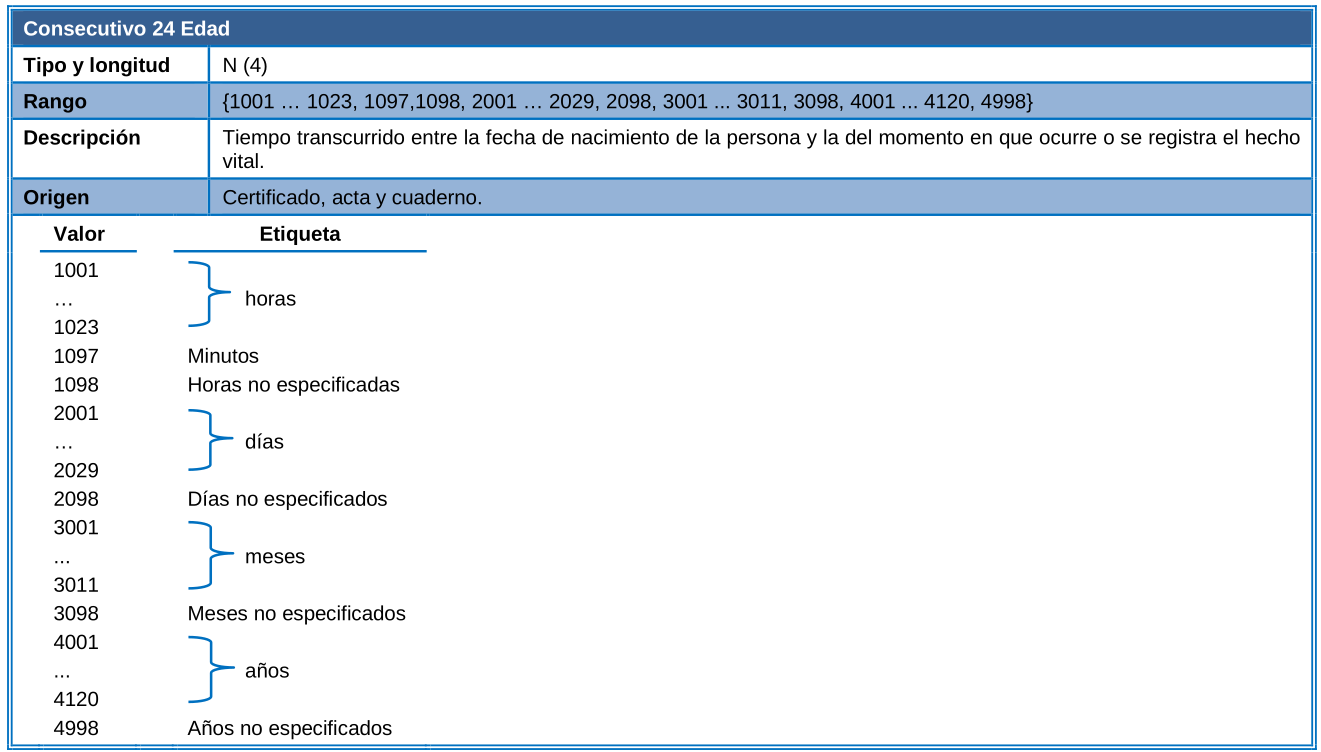

Para entender mejor los datos veremos solo los valores únicos con la función `.unique()`.

In [6]:
df['EDAD'].unique()

array([4073, 4077, 4069, 4094, 4048, 4081, 4065, 4084, 4055, 4087, 4086,
       4064, 4091, 4042, 4047, 4074, 4049, 4052, 4051, 4060, 4075, 2003,
       4071, 4089, 4057, 4063, 4085, 4090, 4066, 4076, 4092, 4056, 4068,
       4088, 4095, 4058, 4059, 4079, 4016, 4062, 4093, 4082, 4050, 4026,
       4096, 4067, 4032, 4043, 4045, 4040, 4046, 4037, 4033, 4072, 4078,
       4080, 4104, 4083, 4053, 4038, 4030, 4070, 4035, 3006, 4061, 4018,
       4044, 4041, 4097, 4054, 4100, 3007, 4019, 4007, 4099, 4098, 4034,
       4009, 4004, 4036, 4031, 3004, 4101, 4998, 2002, 3001, 3003, 4023,
       4028, 4017, 3009, 4029, 4020, 4022, 4015, 4021, 4024, 3010, 4001,
       2007, 4027, 2023, 4025, 4102, 4014, 1018, 4012, 3002, 4039, 2006,
       4008, 4005, 2008, 4006, 4003, 4002, 4010, 2019, 1022, 2004, 2013,
       2005, 1003, 2010, 2012, 2026, 1004, 4013, 2022, 2018, 2029, 2011,
       1014, 4105, 4103, 1011, 1007, 2021, 4011, 1001, 3011, 2009, 3005,
       1021, 1098, 2028, 2001, 2014, 1012, 1002, 20

## 2.e Resumen

En esta lección hemos aprendido varios conceptos:
* Estructura de un proyecto de datos: obtención de datos, exploración, limpieza, análisis
* Organización de los archivos de un proyecto de datos
* Cargar datos a pandas
* Estructura de los conjuntos de datos ordenados o tidy data:
    * Cada observación forma una fila.
    * Cada variable forma una columna.
* Perfiladores o profilers de datos
* Partes de un profile de datos

**¡Gracias!**

## 2.z Extras

### Lectura de otros formatos de archivo

Las funciones de lectura en `pandas` son muy flexibles. La sintaxis cambia un poco dependiendo de la extensión del archivo.

  * **CSV (.csv)**: El formato más común para archivos de datos.
    ```python
    df_csv = pd.read_csv('mi_archivo.csv')
    ```
  * **Excel (.xlsx, .xls)**: Requiere la biblioteca `openpyxl` o `xlrd`.
    ```python
    df_excel = pd.read_excel('mi_archivo.xlsx')
    ```


### Errores comunes al abrir archivos

Durante la carga de datos, puedes encontrarte con algunos errores. Aquí te explicamos los más comunes y cómo solucionarlos.

**`UnicodeDecodeError` o caracteres extraños (`Ã±`, `�`, etc)**. Este error ocurre cuando Python intenta leer un archivo de texto con la [codificación incorrecta](https://es.wikipedia.org/wiki/Codificaci%C3%B3n_de_caracteres), lo que suele suceder con los archivos que contienen caracteres especiales del español (como acentos o la letra 'ñ').

* Solución: La mayoría de las veces, basta con especificar el parámetro `encoding` en la función de lectura.
    ```python
    df = pd.read_csv('archivo_con_acentos.csv', encoding='latin1')
    ```

**`ImportError: Missing optional dependency`**. Este error significa que te falta una biblioteca opcional para leer un formato de archivo específico. Por ejemplo, `pandas` necesita `openpyxl` para leer archivos `.xlsx` de Excel.

* Solución: Instala la biblioteca que te indica el error usando `pip install`.
    ```bash
    !pip install openpyxl
    ```


### Principios de tidy data

Los principios de los conjuntos de datos ordenados (Tidy Data) fueron dados por Hadley Wickham. Recomendamos leer el [artículo original](http://vita.had.co.nz/papers/tidy-data.pdf), que traducimos parcialmente.

Los principios de los **datos ordenados** proporcionan una forma estándar de organizar los valores de datos dentro de un conjunto de datos. Un estándar hace que la limpieza inicial de datos sea más fácil, ya que no es necesario empezar desde cero y reinventar la rueda cada vez. El estándar de datos ordenados ha sido diseñado para facilitar la exploración inicial y el análisis de los datos, y para simplificar el desarrollo de herramientas de análisis de datos que funcionen bien juntas.

Al igual que las familias, los conjuntos de datos ordenados son todos similares, pero cada conjunto de datos desordenado es desordenado de su propia manera. Los conjuntos de datos ordenados proporcionan una forma estandarizada de vincular la estructura de un conjunto de datos (su disposición física) con su semántica (su significado). En esta sección, proporcionaré algunos términos estándar para describir la estructura y la semántica de un conjunto de datos, y luego utilizaré esas definiciones para definir los datos ordenados.

La mayoría de los conjuntos de datos estadísticos son tablas rectangulares compuestas por filas y columnas. Las columnas están casi siempre etiquetadas y las filas a veces están etiquetadas. Nuestro vocabulario de filas y columnas simplemente no es lo suficientemente rico como para describir por qué las dos tablas representan los mismos datos. Además de la apariencia, necesitamos una forma de describir la semántica subyacente o el significado de los valores mostrados en la tabla.

Un conjunto de datos es una colección de valores, generalmente números (si son cuantitativos) o cadenas (si son cualitativas). Los valores están organizados de dos maneras. Cada valor pertenece a una variable y una observación. Una variable contiene todos los valores que miden el mismo atributo subyacente (como la altura, la temperatura, la duración) a través de las unidades. Una observación contiene todos los valores medidos en la misma unidad (como una persona, un día o una carrera) a través de los atributos.

Los datos ordenados son una forma estándar de asignar el significado de un conjunto de datos a su estructura. Un conjunto de datos es
desordenado u ordenado dependiendo de cómo las filas, columnas y tablas se combinan con las observaciones,
variables y tipos. En datos ordenados:
* Cada observación forma una fila.
* Cada variable forma una columna.
* Cada tipo de unidad de observación forma una tabla.

### Opciones avanzadas de profiling

Una distinción importante es que es importante distinguir `data profiling` de `profiling` a secas. Un profile de _datos_ es una descripción general y semi-automática de los datos. Mientras tanto, un profile de _código_ es una técnica que analiza el rendimiento de un programa, por ejemplo, el tiempo que tarda en correr o la memoria que ocupa.

La biblioteca de `ydata_profiling` incluye varias opciones avanzadas, algunas de las cuales mostraremos. No daremos una explicación completa, pero puedes ver los detalles en la [documentación](https://ydata-profiling.ydata.ai/docs/master/index.html).

Es posible realizar múltiples mejoras y ajustes al reporte.

* **title** Agregar un título
* **metadata** Agregar información como descripción, autor, etc al reporte
* **variables** Agregar el diccionario de datos para describir las variables
* **minimal** Llevar a cabo solo algunas correlaciones o ninguna. En el caso de grandes conjuntos de datos se recomienda no realizar correlaciones.
* **sensitive** Oculta los datos desagregados para evitar filtrar información de datos individuales, cómo pueden ser datos personales.

Otra función util en `ydata_profiling` es `compare`, que permite comparar dos conjuntos de datos. Por ejemplo, separa los datos de registros "Masculinos" y "Femeninos", después, se realizan los profiles por separado y los contrastaremos con la función `compare()`.

**Nota** Un error común es que los tipos de datos de los dos subconjuntos no coincidan, en cuyo caso es necesario quitar la columna de ambos conjuntos o hacer una limpieza de datos.